# Code : KV5692F

In [1]:
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt

# Brownian path simulation

Text(0.5, 1.0, 'Discretized Brownian path')

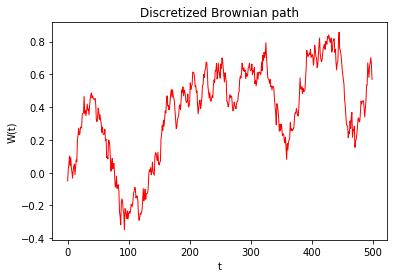

In [2]:
rd.seed(100)
T = 1
N = 500
dt = T/N
dw = np.zeros(N) 
w = np.zeros(N)  

for j in range(N):
    dw[j]= math.sqrt(dt)*rd.normalvariate(0,1)
    w[j] = w[j-1] + dw[j]
    

plt.plot(np.arange(0,N,1),w,color="red",
        linewidth=1)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Discretized Brownian path')

## Brownian path simulation: vectorized

In [3]:
T = 1
N = 500
dt = T/N
#dw= math.sqrt(dt)*np.random.normal(0, 1, N)
w=np.cumsum(dw)

Text(0.5, 1.0, 'Discretized Brownian path')

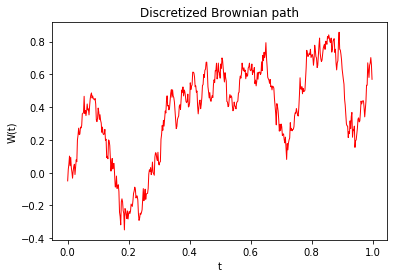

In [4]:
plt.plot(np.arange(0,T,dt),w,color='red',
        linewidth=1)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Discretized Brownian path')

# Function along a Brownian path
### The function u(W(t)) averaged over 1000 discretized Brownian paths and along 5 individual paths

In [5]:

M = 1000
T = 1
N = 500
dt = T/N

t = np.arange(0,T,dt)

dw = np.sqrt(dt)*np.random.normal(0, 1, size=(M,N))

w= np.cumsum(dw,axis=1)

import numpy.matlib
U=np.exp(np.matlib.repmat(t,M, 1)+ 0.5*w)

Umean = np.mean(U,axis=0)
np.shape(Umean)

(500,)

Text(0.5, 1.0, 'The function u(W(t)) averaged over 1000 discretized Brownian paths and along 5 individual paths')

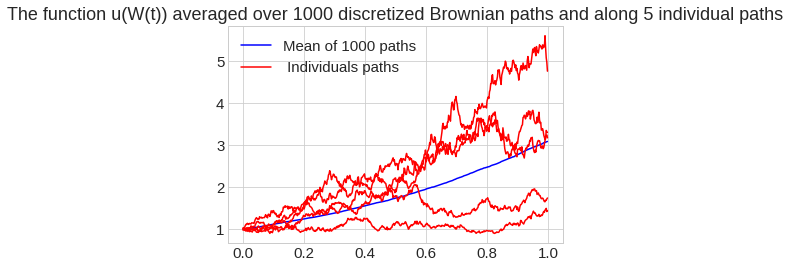

In [6]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size':15})
plt.plot(t,Umean, label="Mean of 1000 paths", color='blue')
plt.legend(loc='upper left')
plt.plot(t,U[0,:],color='red',label=" Individuals paths")
plt.legend(loc='upper left')
for i in range(1,5):
    plt.plot(t,U[i,:], color="red")
plt.title("The function u(W(t)) averaged over 1000 discretized Brownian paths and along 5 individual paths")

# The Euler–Maruyama Method.

In [27]:

lambd = 2
mu = 1
Xzero = 1
T = 1
N = 2**8 
dt = 1/N
dW = math.sqrt(dt)*np.random.normal(0, 1, N)
W = np.cumsum(dW)

Xtrue = Xzero*np.exp((lambd-0.5*mu**2)*(np.arange(0,T,dt))+mu*W)

R = 4
Dt = R*dt
L = int(N/R)
Xem = np.zeros(L)

Xtemp = Xzero

for j in range(L):
    Winc = np.sum(dW[R*(j-1)+1:R*j])
    Xtemp = Xtemp + Dt*lambd*Xtemp + mu*Xtemp*Winc
    Xem[j] = Xtemp
    


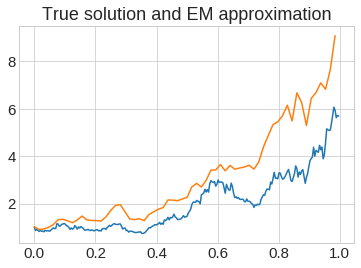

In [28]:
plt.plot(np.arange(0,T,dt),Xtrue)
plt.title('True solution and EM approximation')

plt.plot(np.arange(0,T,Dt),Xem)
